# Creating a Filter, Edge Detection

### Import resources and display image

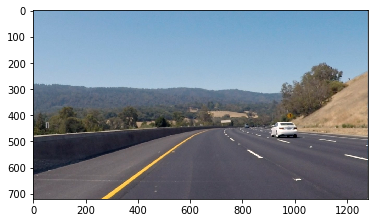

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

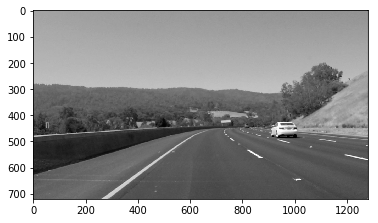

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="data/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

In [9]:
filtered_image_x.shape

(720, 1280)

In [11]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                    [ 0, 0, 0], 
                    [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[ -1, 0, 1], 
                    [ -2, 0, 2], 
                    [ -1, 0, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)

In [12]:
filters = [sobel_x, sobel_y]
filtered_image = [filtered_image_x, filtered_image_y]
n_filters = len(filters)

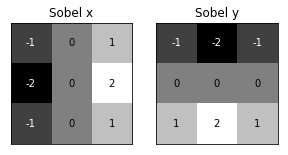

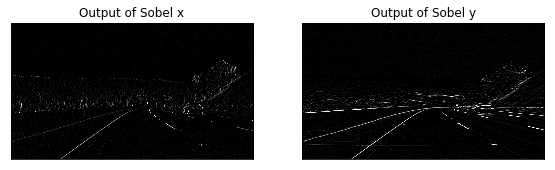

In [13]:
# visualize the two filters
fig = plt.figure(figsize=(10, 5))
for i in range(n_filters):
    ax = fig.add_subplot(1, n_filters+2, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    if i==0:
        ax.set_title('Sobel x')
    else:
        ax.set_title('Sobel y')
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

#visualize the outputs            
fig = plt.figure(figsize=(20, 20))
for i in range(n_filters):
    ax = fig.add_subplot(1, n_filters+2, i+1, xticks=[], yticks=[])
    # grab layer outputs
    ax.imshow(filtered_image[i], cmap='gray')
    if i==0:
        ax.set_title('Output of Sobel x')
    else:
        ax.set_title('Output of Sobel y')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.

